In [4]:
import numpy as np

In [5]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [6]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [7]:
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [8]:
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [10]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

Getting the data from Keras datasets

In [11]:
from keras.datasets import fashion_mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

In [15]:
network = [
    FlattenLayer(input_shape=(28, 28)),
    FCLayer(28 * 28, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 50
learning_rate = 0.1

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    print('%d/%d, error=%f' % (epoch + 1, epochs, error))

1/50, error=0.066016
2/50, error=0.043547
3/50, error=0.035648
4/50, error=0.030214
5/50, error=0.026379
6/50, error=0.023839
7/50, error=0.021532
8/50, error=0.019740
9/50, error=0.018300
10/50, error=0.017142
11/50, error=0.016006
12/50, error=0.015381
13/50, error=0.014738
14/50, error=0.014169
15/50, error=0.013329
16/50, error=0.012744
17/50, error=0.013299
18/50, error=0.011824
19/50, error=0.011319
20/50, error=0.010614
21/50, error=0.010046
22/50, error=0.010655
23/50, error=0.010686
24/50, error=0.010025
25/50, error=0.009687
26/50, error=0.009671
27/50, error=0.009189
28/50, error=0.009073
29/50, error=0.008931
30/50, error=0.008505
31/50, error=0.008205
32/50, error=0.008601
33/50, error=0.008489
34/50, error=0.008020
35/50, error=0.007990
36/50, error=0.007170
37/50, error=0.007167
38/50, error=0.007821
39/50, error=0.006998
40/50, error=0.006761
41/50, error=0.007664
42/50, error=0.007218
43/50, error=0.007138
44/50, error=0.007045
45/50, error=0.006755
46/50, error=0.0062

In [16]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.77
mse: 0.0364


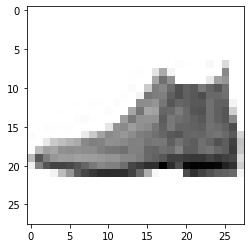

pred: 9, prob: 0.77, true: 9


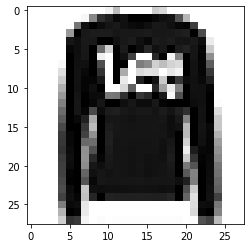

pred: 6, prob: 0.91, true: 2


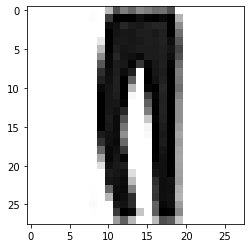

pred: 1, prob: 1.00, true: 1


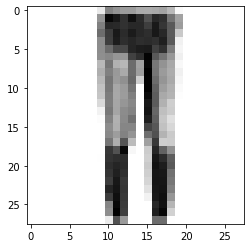

pred: 1, prob: 1.00, true: 1


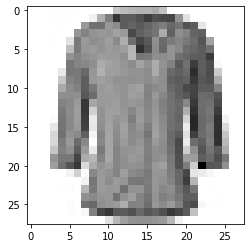

pred: 6, prob: 1.00, true: 6


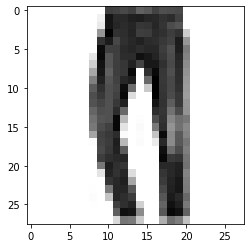

pred: 1, prob: 0.96, true: 1


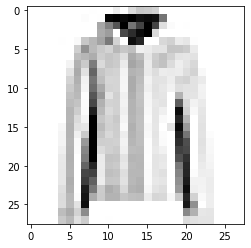

pred: 4, prob: 0.99, true: 4


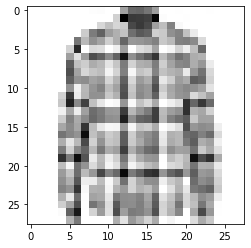

pred: 6, prob: 1.00, true: 6


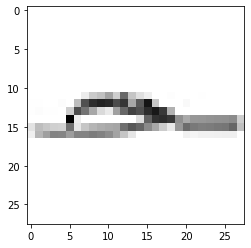

pred: 7, prob: 0.55, true: 5


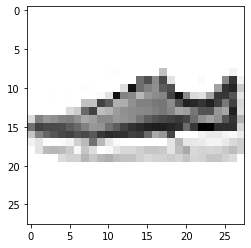

pred: 7, prob: 1.00, true: 7


In [17]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))